<h1>Module 04 Part B: Querying Data in Python</h1>
<p>Now that we can read in a file in pandas, we should learn a few techniques to quickly query our dataframes. The intent of this exercise is to demonstrate how to deal with larger datasets with mixed variable types. This data is a subset of the of 311 service requests from NYC Open Data.</p>

In [1]:
#load your packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
complaints = pd.read_csv('31l-service-calls-ny.cvs')

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<h2>#1 Selecting columns and rows</h2>
<p>To select a column, we index with the name of the column, like this:</p>

In [2]:
complaints['Complaint Type']

0        Noise - Street/Sidewalk
1                Illegal Parking
2             Noise - Commercial
3                Noise - Vehicle
4                         Rodent
5             Noise - Commercial
6               Blocked Driveway
7             Noise - Commercial
8             Noise - Commercial
9             Noise - Commercial
10      Noise - House of Worship
11            Noise - Commercial
12               Illegal Parking
13               Noise - Vehicle
14                        Rodent
15      Noise - House of Worship
16       Noise - Street/Sidewalk
17               Illegal Parking
18        Street Light Condition
19            Noise - Commercial
20      Noise - House of Worship
21            Noise - Commercial
22               Noise - Vehicle
23            Noise - Commercial
24              Blocked Driveway
25       Noise - Street/Sidewalk
26        Street Light Condition
27          Harboring Bees/Wasps
28       Noise - Street/Sidewalk
29        Street Light Condition
          

You can also select just the first five rows as follows:

In [3]:
complaints[:5]

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Or you can select the first five elements of column as follows:

In [4]:
complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

Note that the order of the column selection and row selection does not matter.

In [5]:
complaints['Complaint Type'][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

<h2>#2 Selecting multiple columns</h2>
<p>What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.</p>

In [6]:
complaints[['Complaint Type', 'Borough']]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [7]:
complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


<h2>#3 Counting string types or other data</h2>
<p>Want to know the most common complaint type? This is a really easy question to answer! There's a .value_counts() method that we can use:</p>

In [8]:
complaints['Complaint Type'].value_counts()

Street Light Condition               402
DOF Literature Request               311
HEATING                              190
Blocked Driveway                     177
Noise                                152
Illegal Parking                      137
Traffic Signal Condition             135
Water System                         128
Noise - Commercial                    99
Sanitation Condition                  99
Street Condition                      98
Dirty Conditions                      91
Broken Muni Meter                     91
GENERAL CONSTRUCTION                  85
Building/Use                          84
PLUMBING                              80
General Construction/Plumbing         75
Sewer                                 66
Taxi Complaint                        62
PAINT - PLASTER                       61
Consumer Complaint                    60
Rodent                                54
Noise - Street/Sidewalk               52
Special Enforcement                   49
Damaged Tree    

Now find the top ten!

In [9]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

Street Light Condition      402
DOF Literature Request      311
HEATING                     190
Blocked Driveway            177
Noise                       152
Illegal Parking             137
Traffic Signal Condition    135
Water System                128
Noise - Commercial           99
Sanitation Condition         99
Name: Complaint Type, dtype: int64

<h2>#4 Make plots with one line</h2>

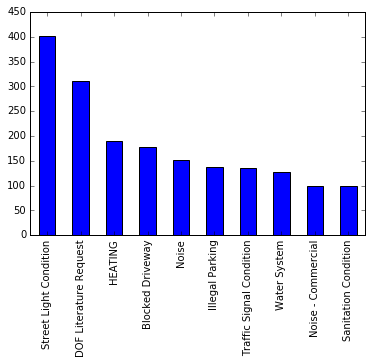

In [10]:
complaint_counts[:10].plot(kind='bar')

<h2>#5 Query data in search of specific strings or values</h2>
<p>Searching for specific data types is made simple with pandas. In the statement below you are asking python to search all complaint types for the string "Noise - Street/Sidewalk".</p>

In [11]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


Let's break this down a bit. Discover what the interior portion of the code produces.

In [12]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0        True
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28       True
29      False
        ...  
3770    False
3771    False
3772    False
3773    False
3774    False
3775    False
3776    False
3777    False
3778    False
3779    False
3780    False
3781    False
3782    False
3783    False
3784    False
3785    False
3786    False
3787    False
3788    False
3789    False
3790    False
3791    False
3792    False
3793    False
3794    False
3795    False
3796    False
3797    False
3798    False
3799    False
Name: Complaint Type, dtype: bool

This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to True. It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.
You can also combine more than one condition with the & operator like this:

In [13]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


<h2>NumPy and Pandas</h2>
On the inside, the type of a column is pd.Series.
but pandas Series are internally numpy arrays. If you add .values to the end of any Series, you'll get its internal numpy array. We will explore this trait with a simplified pandas series.

In [14]:
print(type(complaints['Unique Key']))
print(type(complaints['Unique Key'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Create the simplified pandas series below:

In [15]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

Now let's try some NumPy commands to pull out all of the values which are not the number two.

In [16]:
arr = pd.Series([1,2,3]).values
arr !=2

array([ True, False,  True], dtype=bool)

Does the above output in the form of a Boolean array look familiar? Try the following:

In [17]:
arr[arr !=2]

array([1, 3])

In actuality, this method of querying dataframes actually comes from NumPy. Imagine the ease of identifying 'NaN' in your data, and omitting it. Now we can put our methods to use to find the noisiest of NY Borough's.

In [18]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        26
BRONX             9
BROOKLYN          8
QUEENS            6
STATEN ISLAND     3
Name: Borough, dtype: int64

Now we can store the total noise counts by Borough into the variable noise_complaint_counts, and count the total complaints in order to normalize our data.

In [19]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [20]:
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.020179
BROOKLYN         0.007394
MANHATTAN        0.030588
QUEENS           0.006857
STATEN ISLAND    0.016304
Unspecified           NaN
Name: Borough, dtype: float64

Another quick plot!

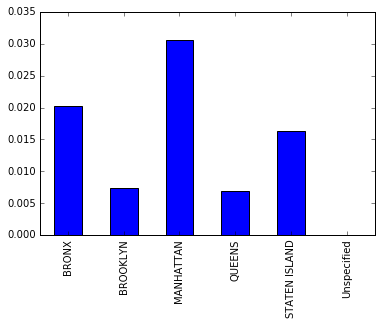

In [21]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

<h2>Exercises</h2>
<p>Use the code you have learned to calculate 5 and 10 year rolling averages for the weather data in the file champaign-wx-1888-present.csv.  Find the record extreme temperatures and precipitation</p>

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
weather = pd.read_csv('champaign-wx-1888-present.csv', comment = '%')
#print(weather)
weather[:47133]

,Date,PRCP,SNOW,SNWD,TMAX,TMIN,Unnamed: 6
0,1888-09-01,0.00,M,M,72,44,NaN
1,1888-09-02,0.00,M,M,79,39,NaN
2,1888-09-03,0.00,M,M,82,42,NaN
3,1888-09-04,0.00,M,M,83,47,NaN
4,1888-09-05,0.00,M,M,76,48,NaN
5,1888-09-06,0.00,M,M,78,53,NaN
6,1888-09-07,0.00,M,M,86,52,NaN
7,1888-09-08,0.03,M,M,89,63,NaN
8,1888-09-09,0.00,M,M,81,54,NaN
9,1888-09-10,0.00,M,M,84,45,NaN
